# Explicación Detallada: Sección 7.2 - Sistemas Predictivos Conformes

Esta sección del libro "Algorithmic Learning in a Random World" introduce formalmente el concepto de generar **distribuciones de probabilidad predictivas completas** en lugar de solo conjuntos o intervalos de predicción, utilizando el marco de la predicción conforme. El enfoque principal es la **regresión**, donde el espacio de etiquetas $Y$ es típicamente $\mathbb{R}$.

## Objetivo de la Sección 7.2

El objetivo principal es definir matemáticamente qué son los "Sistemas Predictivos Conformes" (CPS) y las "Distribuciones Predictivas Conformes" (CPD), estableciendo la base teórica para las aplicaciones y análisis que se desarrollan más adelante en el capítulo 7. Se busca extender la garantía de validez de la predicción conforme al ámbito de las distribuciones predictivas.

## 7.2.1 Definiciones Básicas

Se parte del escenario de predicción estándar (one-off u online): dados los ejemplos de entrenamiento $z_1, \dots, z_{n-1}$ (donde $z_i = (x_i, y_i)$) y un nuevo objeto $x_n$, el objetivo es predecir su etiqueta $y_n \in \mathbb{R}$.

### Sistema Predictivo Determinista (DPS - Deterministic Predictive System)

*   **Definición:** Es una función medible $\Pi: Z^n \to [0, 1]$. Para una secuencia completa de $n$ ejemplos, devuelve un valor.
*   **Propiedades:** Para un entrenamiento y $x_n$ fijos, la función resultante $\Pi_n(y) := \Pi(z_1, \dots, z_{n-1}, (x_n, y))$ debe cumplir:
    1.  **r1 (Monotonía en y):** $\Pi_n(y)$ debe ser **monótonamente creciente** respecto a la etiqueta postulada $y$.
    2.  **r2 (Límites):** $\lim_{y \to -\infty} \Pi_n(y) = 0$ y $\lim_{y \to \infty} \Pi_n(y) = 1$.
*   **Interpretación:** Un DPS genera una función $\Pi_n(y)$ que tiene las propiedades básicas de una **Función de Distribución Acumulada (CDF)** para la predicción de $y_n$.

### Sistema Predictivo Aleatorizado (RPS - Randomized Predictive System)

Esta es la generalización crucial que introduce la aleatorización necesaria para las propiedades de validez más fuertes de la predicción conforme.

*   **Definición:** Es una función medible $\Pi: Z^n \times [0, 1] \to [0, 1]$, que ahora depende también de un número aleatorio $\tau \in [0, 1]$ (típicamente $\tau \sim U[0, 1]$).
*   **Propiedades:** Para un entrenamiento y $x_n$ fijos, la función $\Pi_n(y, \tau) := \Pi(\dots, (x_n, y), \tau)$ debe cumplir:
    1.  **R1 (Doble Monotonía):** $\Pi_n(y, \tau)$ es monótonamente creciente tanto en $y$ (para $\tau$ fijo) como en $\tau$ (para $y$ fijo).
    2.  **R2 (Límites Extremos):** $\lim_{y \to -\infty} \Pi_n(y, \mathbf{0}) = 0$ y $\lim_{y \to \infty} \Pi_n(y, \mathbf{1}) = 1$.
*   **Salida (RPD):** La función $\Pi_n(y, \tau)$ (Eq. 7.3) se llama **Distribución Predictiva Aleatorizada**. Para un $\tau$ fijo, es una CDF. Al variar $\tau$, genera una "banda" o CDF "difusa".
*   **Intervalo $[\Pi_n(y, 0), \Pi_n(y, 1)]$:** Para un $y$ fijo, la salida es un intervalo cerrado (debido a la monotonía en $\tau$). Su longitud mide la "incertidumbre" o "difuminado" introducido por la aleatorización.
*   **Grosor (Thickness):** El tamaño máximo (esencialmente) de esta longitud $\Pi_n(y, 1) - \Pi_n(y, 0)$. En predicción conforme, se espera que sea del orden de $1/n$.
*   **Tamaño de Excepción:** Número de puntos $y$ donde la longitud del intervalo excede el grosor.

### Sistema Predictivo Conforme (CPS) y Distribución Predictiva Conforme (CPD)

Aquí se conecta la estructura de RPS con el mecanismo conformal.

*   **Recordatorio: Transductor Conforme (TC):** Construido a partir de una medida de **conformidad** $A$. El p-valor (suavizado) es (Eq. 7.6):
    \[ \Pi(z_1, \dots, z_n, \tau) = \frac{|\{i : \alpha_i < \alpha_n\}| + \tau |\{i : \alpha_i = \alpha_n\}|}{n} \]
    donde $\alpha_i = A(z_1, \dots, z_n, z_i)$. (Nota: `<` porque $A$ es conformidad).
*   **Definición CPS:** Un CPS es una función $\Pi$ que es tanto un **RPS** (cumple R1 y R2) como un **TC** (se deriva de alguna medida de conformidad $A$).
*   **Salida (CPD):** La RPD $\Pi_n$ generada por un CPS se llama **Distribución Predictiva Conforme**. Es la CDF "difusa" que resulta del proceso conformal.

## 7.2.2 Propiedades de Validez

Esta subsección explica la garantía fundamental que ofrecen los CPS.

*   **Calibración en Probabilidad:** La propiedad clave de los Transductores Conformes Suavizados se hereda: si los datos $z_i$ son IID (o intercambiables) y $\tau_i$ son IID $U[0, 1]$ independientes, entonces los valores $p_n = \Pi(z_1, \dots, z_n, \tau_n)$ (el p-valor del último ejemplo real) son **IID $U[0, 1]$**.
*   **Interpretación para Predicción:** Esto significa que la CPD está perfectamente calibrada. La probabilidad de que la etiqueta verdadera $y_n$ sea menor o igual que el cuantil $q$ de la CPD es exactamente $q$:
    \[ \Prob(\Pi_n(y_n, \tau_n) \le q) = q \]
*   **Validez Fuerte (Online):** Los valores $\Pi(z_1, \dots, z_n, \tau_n)$ son *independientes* entre sí a lo largo del tiempo, no solo uniformes marginalmente.
*   **Conexión con CDFs (Lema 7.1):** La combinación de monotonía y calibración (uniformidad) es lo que caracteriza a una función de distribución (en el caso continuo). Los CPS logran esto mediante el mecanismo conformal.
*   **Conformidad a Propiedad:** Para que la CPD ($\Pi_n$) sea monótona en $y$, la medida de conformidad $A$ subyacente debe medir conformidad a una *propiedad* (como "ser grande", $y - \hat{y}$) en lugar de solo al *bag* (como $|y - \hat{y}|$).

## 7.2.3 Ejemplo Más Simple: Medidas de Conformidad Monótonas

Se busca una condición simple sobre $A$ para garantizar que el TC sea un CPS.

*   **Medida de Conformidad Monótona:** Una medida $A$ es monótona si $A^{\text{del}}(z_1, \dots, z_{n-1}, z_n)$ es:
    *   Creciente en la etiqueta $y_n$.
    *   Decreciente en la etiqueta $y_i$ para $i < n$.
*   **Resultado:** Si $A$ es monótona, el TC asociado es un CPS válido.
*   **Ejemplo:** La medida $A = y_n - \hat{y}_n$ con $\hat{y}_n$ de k-NN.

## 7.2.4 Criterio para ser un CPS

Se presenta una condición más general y útil.

*   **Proposición 7.2:** El TC asociado a $A$ cumple R1 (monotonía en $y$) si la diferencia de scores $\alpha^y_n - \alpha^y_i$ es una función monótonamente creciente de $y$ para todo $i < n$.
*   **Corolario 7.3:** Si además los scores tienen rangos globales bien definidos, el TC es un RPS (y por tanto CPS).
*   **Importancia:** Proporciona un criterio verificable para las medidas de conformidad que garantizan CPDs válidas. El LSPM studentizado lo cumple.

## Resumen de la Sección 7.2

Esta sección define formalmente los Sistemas Predictivos Conformes (CPS) como una forma de generar Distribuciones Predictivas Conformes (CPD) para regresión. Un CPS es un Sistema Predictivo Aleatorizado (RPS) que además se construye como un Transductor Conforme. Su propiedad fundamental es la calibración en probabilidad (los valores $\Pi_n(y_n, \tau_n)$ son IID U[0,1]), garantizada bajo intercambiabilidad. Se establecen condiciones sobre la medida de conformidad subyacente para asegurar estas propiedades.

--- Configuración ---
Datos entrenamiento (y): [ 1.2  0.5  2.5 -0.3  1.8]
Tamaño entrenamiento (l=n-1): 5
Tamaño aumentado (n): 6
Número aleatorio (tau_n): 0.1090
--------------------

--- Cálculo Paso a Paso ---

Tabla de Cálculo Detallado:


,y_postulado,Scores (Aug),alpha_n,N_<,N_=,NumP_n,Pi_n (CPD)
0,-1.000,[ 1.2 0.5 2.5 -0.3 1.8 -1. ],-1.000,0,1,0.109,0.018
1,-0.679,[ 1.2 0.5 2.5 -0.3 1.8 -0.68],-0.679,0,1,0.109,0.018
2,-0.357,[ 1.2 0.5 2.5 -0.3 1.8 -0.36],-0.357,0,1,0.109,0.018
3,-0.036,[ 1.2 0.5 2.5 -0.3 1.8 -0.04],-0.036,1,1,1.109,0.185
4,0.286,[ 1.2 0.5 2.5 -0.3 1.8 0.29],0.286,1,1,1.109,0.185
5,0.607,[ 1.2 0.5 2.5 -0.3 1.8 0.61],0.607,2,1,2.109,0.352
6,0.929,[ 1.2 0.5 2.5 -0.3 1.8 0.93],0.929,2,1,2.109,0.352
7,1.250,[ 1.2 0.5 2.5 -0.3 1.8 1.25],1.250,3,1,3.109,0.518
8,1.571,[ 1.2 0.5 2.5 -0.3 1.8 1.57],1.571,3,1,3.109,0.518
9,1.893,[ 1.2 0.5 2.5 -0.3 1.8 1.89],1.893,4,1,4.109,0.685


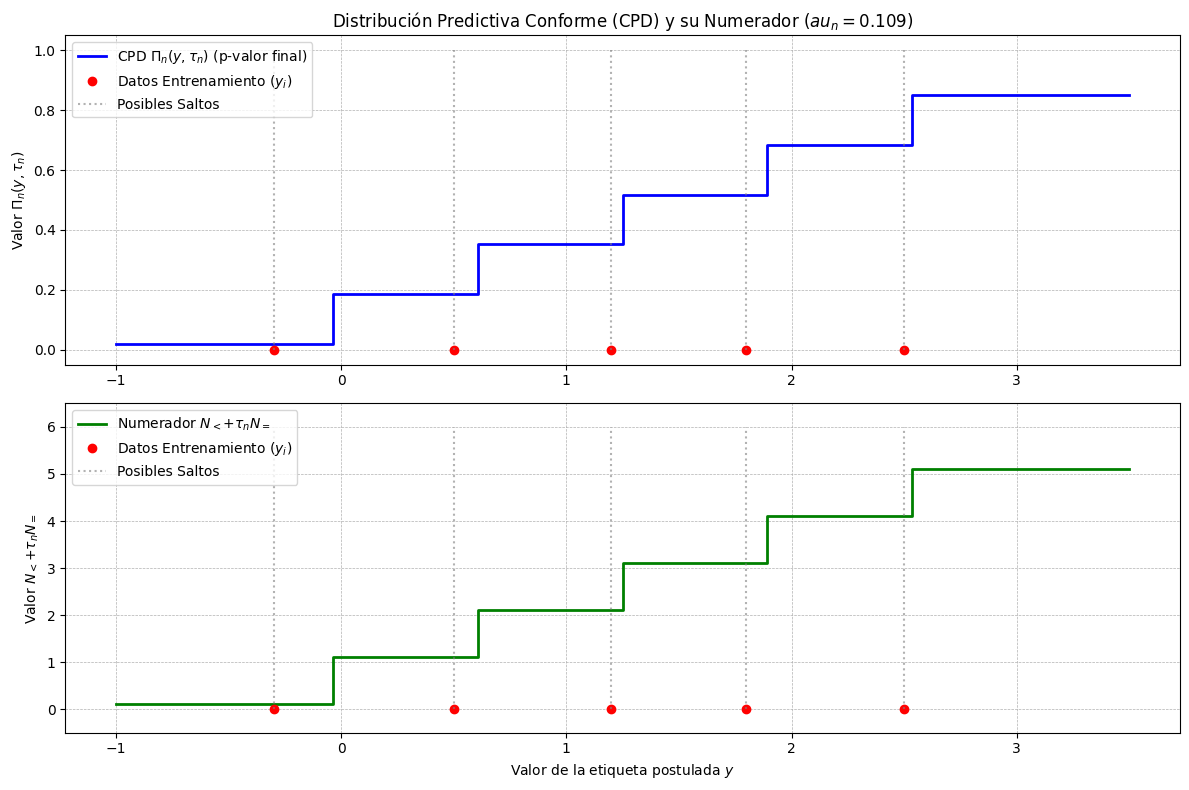


Explicación de los Gráficos:
Gráfico Superior (Azul): Muestra la CPD final, $\Pi_n(y, \tau_n)$. Es la CDF aleatorizada, normalizada entre 0 y 1.
Gráfico Inferior (Verde): Muestra el 'numerador' del p-valor, NumP_n = N_< + tau_n * N_=. Representa la 'cuenta suavizada' de ejemplos menos o igual de conformes. Está escalado entre 0 y n.
La CPD (azul) es simplemente el Numerador (verde) dividido por n=6.
Ambos gráficos son funciones escalonadas crecientes. Los saltos ocurren en los valores y_i del conjunto aumentado.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Para mostrar la tabla claramente

def calculate_conformity_scores_simple(training_y, postulated_y):
  """Calcula scores para A=y (simplificado)."""
  return np.append(training_y, postulated_y)

def calculate_p_value_components(scores, tau_n):
  """
  Calcula los componentes del p-valor y el p-valor final para el último score.

  Args:
    scores: Lista de scores de conformidad [alpha_1, ..., alpha_n].
    tau_n: Número aleatorio uniforme en [0, 1].

  Returns:
    tupla: (count_less, count_equal, numerator_p, final_p_value)
           NumP_n(y, tau_n) ---^          ^--- Pi_n(y, tau_n)
  """
  n = len(scores)
  if n == 0:
    return 0, 0, 0, tau_n # O alguna convención

  alpha_n = scores[-1] # Score del ejemplo postulado (xn, y)

  # Usamos < porque A es medida de CONFORMIDAD
  count_less = np.sum(scores < alpha_n)
  count_equal = np.sum(scores == alpha_n)

  # Asegurarse de que count_equal >= 1 si n > 0
  if n > 0 and count_equal == 0:
     # Esto teóricamente no pasa si alpha_n está en scores
     # Podría indicar un problema de precisión numérica si alpha_n
     # no se encuentra exactamente a sí mismo. Forzamos count_equal a 1.
     print(f"Advertencia: count_equal fue 0 para alpha_n={alpha_n}. Forzando a 1.")
     count_equal = 1 # Debe incluirse a sí mismo

  numerator_p = count_less + tau_n * count_equal
  final_p_value = numerator_p / n

  return count_less, count_equal, numerator_p, final_p_value

# --- Datos de Ejemplo ---
training_data_y = np.array([1.2, 0.5, 2.5, -0.3, 1.8])
training_data = [(None, y) for y in training_data_y]
test_x = None

# --- Generar la CPD y Componentes ---
n_train = len(training_data)
n_augmented = n_train + 1
tau_n = np.random.rand() # Usar el mismo tau para toda la curva CPD

print(f"--- Configuración ---")
print(f"Datos entrenamiento (y): {training_data_y}")
print(f"Tamaño entrenamiento (l=n-1): {n_train}")
print(f"Tamaño aumentado (n): {n_augmented}")
print(f"Número aleatorio (tau_n): {tau_n:.4f}")
print("-" * 20)

# Rejilla de valores 'y' para evaluar
y_grid = np.linspace(-1, 3.5, 15) # Menos puntos para tabla legible
cpd_values = np.zeros_like(y_grid)
numerator_p_values = np.zeros_like(y_grid)
counts_less = np.zeros_like(y_grid, dtype=int)
counts_equal = np.zeros_like(y_grid, dtype=int)

print("\n--- Cálculo Paso a Paso ---")
results_list = []

for idx, y_postulated in enumerate(y_grid):
  # 1. Calcular scores (simplificado para A=y)
  all_scores = calculate_conformity_scores_simple(training_data_y, y_postulated)

  # 2. Calcular componentes del p-valor y p-valor final
  count_less, count_equal, numerator_p, final_p_value = calculate_p_value_components(all_scores, tau_n)

  # Almacenar resultados
  cpd_values[idx] = final_p_value
  numerator_p_values[idx] = numerator_p
  counts_less[idx] = count_less
  counts_equal[idx] = count_equal

  results_list.append({
      'y_postulado': f"{y_postulated:.3f}",
      'Scores (Aug)': str(np.round(all_scores, 2)),
      'alpha_n': f"{y_postulated:.3f}",
      'N_<': count_less,
      'N_=': count_equal,
      'NumP_n': f"{numerator_p:.3f}",
      'Pi_n (CPD)': f"{final_p_value:.3f}"
  })

# --- Mostrar Tabla Detallada ---
results_df = pd.DataFrame(results_list)
print("\nTabla de Cálculo Detallado:")
display(results_df)


# --- Visualización ---
plt.figure(figsize=(12, 8))

# Gráfico 1: CPD (Pi_n) - La función de distribución final
plt.subplot(2, 1, 1)
plt.step(y_grid, cpd_values, where='post', label=f'CPD $\Pi_n(y, \\tau_n)$ (p-valor final)', color='blue', linewidth=2)
plt.plot(training_data_y, np.zeros_like(training_data_y), 'ro', markersize=6, label='Datos Entrenamiento ($y_i$)')
plt.vlines(np.unique(training_data_y), 0, 1, colors='gray', linestyles='dotted', alpha=0.6, label='Posibles Saltos')
plt.ylabel(r"Valor $\Pi_n(y, \tau_n)$")
plt.title(f"Distribución Predictiva Conforme (CPD) y su Numerador ($\tau_n={tau_n:.3f}$)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper left')
plt.ylim(-0.05, 1.05)

# Gráfico 2: Numerador del p-valor (NumP_n) - El valor "crudo"
plt.subplot(2, 1, 2)
plt.step(y_grid, numerator_p_values, where='post', label=r'Numerador $N_< + \tau_n N_=$', color='green', linewidth=2)
plt.plot(training_data_y, np.zeros_like(training_data_y), 'ro', markersize=6, label='Datos Entrenamiento ($y_i$)')
plt.vlines(np.unique(training_data_y), 0, n_augmented, colors='gray', linestyles='dotted', alpha=0.6, label='Posibles Saltos')
plt.xlabel("Valor de la etiqueta postulada $y$")
plt.ylabel(r"Valor $N_< + \tau_n N_=$")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper left')
plt.ylim(-0.5, n_augmented + 0.5) # Escala de 0 a n

plt.tight_layout()
plt.show()

print("\nExplicación de los Gráficos:")
print("Gráfico Superior (Azul): Muestra la CPD final, $\Pi_n(y, \\tau_n)$. Es la CDF aleatorizada, normalizada entre 0 y 1.")
print("Gráfico Inferior (Verde): Muestra el 'numerador' del p-valor, NumP_n = N_< + tau_n * N_=. Representa la 'cuenta suavizada' de ejemplos menos o igual de conformes. Está escalado entre 0 y n.")
print(f"La CPD (azul) es simplemente el Numerador (verde) dividido por n={n_augmented}.")
print("Ambos gráficos son funciones escalonadas crecientes. Los saltos ocurren en los valores y_i del conjunto aumentado.")

--- Configuración ---
Medida de Conformidad A(z) = y
Datos entrenamiento (y): [ 1.2  0.5  2.5 -0.3  1.8  0.5]
Tamaño entrenamiento (l=n-1): 6
Tamaño aumentado (n): 7
Número aleatorio fijo (tau_n): 0.1839
------------------------------

--- Cálculo Paso a Paso (en rejilla gruesa para tabla) ---

Tabla de Cálculo Detallado:
y_postulado alpha_n  N_<  N_= Pi_n(y,0) Pi_n(y,1) Pi_n(y,tau)
   -0.80     -0.80   0    1     0.000     0.143      0.026   
   -0.42     -0.42   0    1     0.000     0.143      0.026   
   -0.04     -0.04   1    1     0.143     0.286      0.169   
    0.34      0.34   1    1     0.143     0.286      0.169   
    0.72      0.72   3    1     0.429     0.571      0.455   
    1.10      1.10   3    1     0.429     0.571      0.455   
    1.48      1.48   4    1     0.571     0.714      0.598   
    1.86      1.86   5    1     0.714     0.857      0.741   
    2.24      2.24   5    1     0.714     0.857      0.741   
    2.62      2.62   6    1     0.857     1.000      0.8

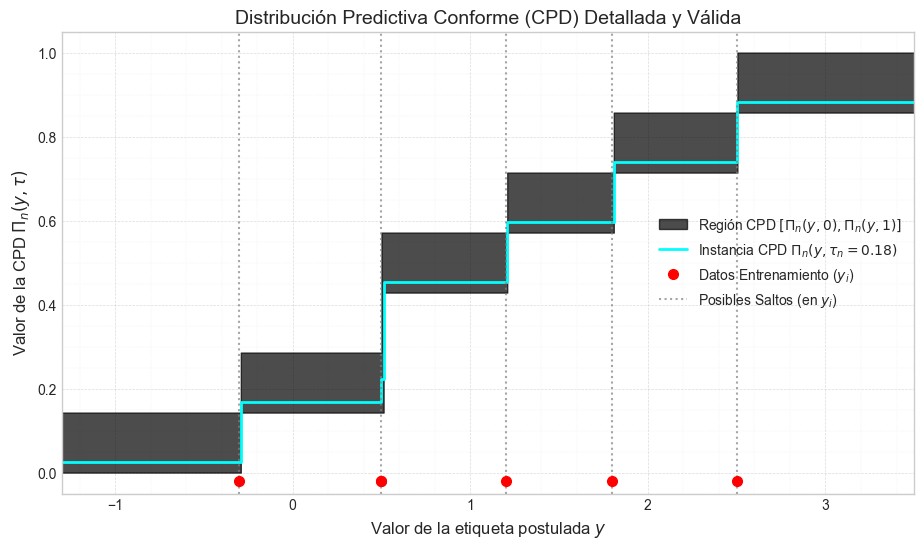


Explicación del gráfico:
La región negra sombreada (banda) muestra el rango [Pi_n(y,0), Pi_n(y,1)] para cada y.
La altura vertical de la banda es (N_=)/n. Es cero si no hay empates con y.
La línea cian es una realización de la CPD para el tau_n específico.
La función es ahora MONÓTONAMENTE CRECIENTE, como debe ser una CDF.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-v0_8-whitegrid') # Estilo de gráfico más limpio

# --- PASO 0: Definir la Medida de Conformidad VÁLIDA ---
def conformity_measure_identity(data, index):
  """
  Medida de conformidad válida simple: A(z_i) = y_i.
  Mayor valor = mayor conformidad.
  Ignora x_i y el resto del bag para ilustración.
  """
  if index < 0 or index >= len(data):
      raise IndexError("Índice fuera de rango")
  _x, y = data[index]
  if y is None: return -np.inf
  return y

# --- Funciones Auxiliares (sin cambios respecto al código válido anterior) ---
def calculate_conformity_scores(training_data, test_x, postulated_y, conformity_measure_func):
  """Calcula los n scores de conformidad para el conjunto aumentado."""
  n_minus_1 = len(training_data)
  n = n_minus_1 + 1
  augmented_data = list(training_data) + [(test_x, postulated_y)]
  scores = np.zeros(n)
  for i in range(n):
    scores[i] = conformity_measure_func(augmented_data, i)
  return scores

def calculate_cpd_interval_and_point(scores, tau_n):
  """
  Calcula los componentes, el intervalo [Pi_n(y,0), Pi_n(y,1)] y un punto Pi_n(y, tau_n).
  """
  n = len(scores)
  if n == 0: return 0, 0, 0.0, 1.0, tau_n

  alpha_n = scores[-1]
  # A es conformidad: mayor es mejor. p-valor cuenta los PEORES (menores) o iguales.
  count_less = np.sum(scores < alpha_n)
  count_equal = np.sum(scores == alpha_n)
  if n > 0 and count_equal == 0: count_equal = 1 # Debe contarse a sí mismo

  cpd_min = count_less / n
  cpd_max = (count_less + count_equal) / n
  cpd_point = (count_less + tau_n * count_equal) / n

  return count_less, count_equal, cpd_min, cpd_max, cpd_point

# --- PASO 1: Datos de Ejemplo y Configuración ---
training_data_y = np.array([1.2, 0.5, 2.5, -0.3, 1.8, 0.5]) # Con duplicado
training_data = [(None, y) for y in training_data_y]
test_x = None
conformity_measure = conformity_measure_identity # Usar la medida válida

n_train = len(training_data)
n_augmented = n_train + 1
tau_n_fixed = np.random.rand() # Usar el mismo tau

print(f"--- Configuración ---")
print(f"Medida de Conformidad A(z) = y") # Cambiado
print(f"Datos entrenamiento (y): {training_data_y}")
print(f"Tamaño entrenamiento (l=n-1): {n_train}")
print(f"Tamaño aumentado (n): {n_augmented}")
print(f"Número aleatorio fijo (tau_n): {tau_n_fixed:.4f}")
print("-" * 30)

# Rejilla fina para visualización
y_grid = np.linspace(min(training_data_y)-1, max(training_data_y)+1, 401) # Más puntos
cpd_min_values = np.zeros_like(y_grid)
cpd_max_values = np.zeros_like(y_grid)
cpd_point_values = np.zeros_like(y_grid)

# Rejilla más gruesa para la tabla
y_grid_table = np.linspace(min(training_data_y)-0.5, max(training_data_y)+0.5, 11) # Menos puntos para tabla
results_list = []

print("\n--- Cálculo Paso a Paso (en rejilla gruesa para tabla) ---")

# --- PASO 2 y 3: Iterar, Calcular Scores y p-valores ---
for y_postulated in y_grid_table:
  all_scores = calculate_conformity_scores(training_data, test_x, y_postulated, conformity_measure)
  alpha_n_y = all_scores[-1]
  count_less, count_equal, cpd_min, cpd_max, cpd_point = calculate_cpd_interval_and_point(all_scores, tau_n_fixed)
  results_list.append({
      'y_postulado': f"{y_postulated:.2f}",
      'alpha_n': f"{alpha_n_y:.2f}",
      'N_<': count_less,
      'N_=': count_equal,
      'Pi_n(y,0)': f"{cpd_min:.3f}", # Límite inferior de la banda
      'Pi_n(y,1)': f"{cpd_max:.3f}", # Límite superior de la banda
      'Pi_n(y,tau)': f"{cpd_point:.3f}" # Valor específico
  })

results_df = pd.DataFrame(results_list)
print("\nTabla de Cálculo Detallado:")
print(results_df.to_string(index=False, justify='center'))
print("-" * 30)

# --- Calcular para la rejilla fina (para gráfico) ---
for idx, y_postulated in enumerate(y_grid):
    all_scores = calculate_conformity_scores(training_data, test_x, y_postulated, conformity_measure)
    _cl, _ce, cpd_min, cpd_max, cpd_point = calculate_cpd_interval_and_point(all_scores, tau_n_fixed)
    cpd_min_values[idx] = cpd_min
    cpd_max_values[idx] = cpd_max
    cpd_point_values[idx] = cpd_point

# --- PASO 4: Visualizar la CPD ---
print("\nGenerando gráfico mejorado...")
plt.figure(figsize=(11, 6)) # Ligeramente más ancho

# Dibujar la "banda" sombreada (negro semitransparente)
plt.fill_between(y_grid, cpd_min_values, cpd_max_values, step='post',
                 color='black', alpha=0.7, label=r'Región CPD $[\Pi_n(y,0), \Pi_n(y,1)]$')

# Dibujar la instancia específica de la CPD (línea cian más gruesa)
plt.step(y_grid, cpd_point_values, where='post',
         label=fr'Instancia CPD $\Pi_n(y, \tau_n={tau_n_fixed:.2f})$', color='cyan', linestyle='-', linewidth=2)

# Marcar datos de entrenamiento (con zorder para estar encima)
plt.plot(training_data_y, np.zeros_like(training_data_y)-0.02, # Ligeramente debajo del eje
         'ro', markersize=7, label='Datos Entrenamiento ($y_i$)', zorder=5)

# Marcar posibles saltos (líneas grises más claras)
unique_train_y_sorted = np.unique(training_data_y)
plt.vlines(unique_train_y_sorted, -0.05, 1.05, colors='grey', linestyles='dotted', alpha=0.7, label='Posibles Saltos (en $y_i$)')

# Mejoras visuales
plt.xlabel("Valor de la etiqueta postulada $y$", fontsize=12)
plt.ylabel(r"Valor de la CPD $\Pi_n(y, \tau)$", fontsize=12)
plt.title("Distribución Predictiva Conforme (CPD) Detallada y Válida", fontsize=14)
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.grid(True, which='minor', linestyle=':', linewidth=0.3, alpha=0.5)
plt.minorticks_on()
plt.legend(loc='center right', fontsize=10)
plt.ylim(-0.05, 1.05)
plt.xlim(y_grid[0], y_grid[-1])
plt.show()

print("\nExplicación del gráfico:")
print("La región negra sombreada (banda) muestra el rango [Pi_n(y,0), Pi_n(y,1)] para cada y.")
print("La altura vertical de la banda es (N_=)/n. Es cero si no hay empates con y.")
print("La línea cian es una realización de la CPD para el tau_n específico.")
print("La función es ahora MONÓTONAMENTE CRECIENTE, como debe ser una CDF.")